In [28]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
# import spacy
import matplotlib.pyplot as plt

In [29]:
atas = pd.read_csv('gazettes-28.03.2020.csv')

print(atas.info())
atas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   crawled_at        2000 non-null   object
 1   crawled_from      2000 non-null   object
 2   date              2000 non-null   object
 3   events            2000 non-null   object
 4   file_content      2000 non-null   object
 5   file_urls         2000 non-null   object
 6   power             2000 non-null   object
 7   year_and_edition  2000 non-null   object
dtypes: object(8)
memory usage: 125.1+ KB
None


,crawled_at,crawled_from,date,events,file_content,file_urls,power,year_and_edition
0,2020-03-28 11:38:55.381684,http://www.diariooficial.feiradesantana.ba.gov...,2020-03-23,"[{'title': 'DECRETO Nº 11.497, DE 20 DE MARÇO ...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,http://www.diariooficial.feiradesantana.ba.gov...,executivo,Ano VI - Edição EXTRA Nº 1255
1,2020-03-28 11:38:55.376785,http://www.diariooficial.feiradesantana.ba.gov...,2020-03-23,"[{'title': 'DECRETO N° 11.501, DE 23 DE MARÇO ...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,http://www.diariooficial.feiradesantana.ba.gov...,executivo,Ano VI - Edição EXTRA Nº 1254
2,2020-03-28 11:38:55.365582,http://www.diariooficial.feiradesantana.ba.gov...,2020-03-20,"[{'title': 'DECRETO N° 11.498, DE 20 DE MARÇO...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,http://www.diariooficial.feiradesantana.ba.gov...,executivo,Ano VI - Edição EXTRA Nº 1252
3,2020-03-28 11:38:55.346353,http://www.diariooficial.feiradesantana.ba.gov...,2020-03-18,"[{'title': 'DECRETO N° 11.492, DE 18 DE MARÇO ...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,http://www.diariooficial.feiradesantana.ba.gov...,executivo,Ano VI - Edição EXTRA Nº 1249
4,2020-03-28 11:38:55.772806,http://www.diariooficial.feiradesantana.ba.gov...,2020-03-16,"[{'title': 'DECRETO N° 11.490, DE 16 DE MARÇO ...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,http://www.diariooficial.feiradesantana.ba.gov...,executivo,Ano VI - Edição EXTRA Nº 1246


In [23]:
atas.drop(['crawled_at', 'crawled_from', 'file_urls'],
         inplace=True, axis=1)

atas.head()

,date,events,file_content,power,year_and_edition
0,2020-03-23,"[{'title': 'DECRETO Nº 11.497, DE 20 DE MARÇO ...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,executivo,Ano VI - Edição EXTRA Nº 1255
1,2020-03-23,"[{'title': 'DECRETO N° 11.501, DE 23 DE MARÇO ...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,executivo,Ano VI - Edição EXTRA Nº 1254
2,2020-03-20,"[{'title': 'DECRETO N° 11.498, DE 20 DE MARÇO...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,executivo,Ano VI - Edição EXTRA Nº 1252
3,2020-03-18,"[{'title': 'DECRETO N° 11.492, DE 18 DE MARÇO ...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,executivo,Ano VI - Edição EXTRA Nº 1249
4,2020-03-16,"[{'title': 'DECRETO N° 11.490, DE 16 DE MARÇO ...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,executivo,Ano VI - Edição EXTRA Nº 1246


In [24]:
atas['date'] = pd.to_datetime(atas['date'])
print(f'Menor data: {atas.date.min()}\nMaior data: {atas.date.max()}')
print(atas.info())

Menor data: 2015-06-01 00:00:00
Maior data: 2020-03-28 00:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              2000 non-null   datetime64[ns]
 1   events            2000 non-null   object        
 2   file_content      2000 non-null   object        
 3   power             2000 non-null   object        
 4   year_and_edition  2000 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 78.2+ KB
None


,date,events,file_content,power,year_and_edition
0,2020-03-23,"[{'title': 'DECRETO Nº 11.497, DE 20 DE MARÇO ...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,executivo,Ano VI - Edição EXTRA Nº 1255
1,2020-03-23,"[{'title': 'DECRETO N° 11.501, DE 23 DE MARÇO ...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,executivo,Ano VI - Edição EXTRA Nº 1254
2,2020-03-20,"[{'title': 'DECRETO N° 11.498, DE 20 DE MARÇO...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,executivo,Ano VI - Edição EXTRA Nº 1252
3,2020-03-18,"[{'title': 'DECRETO N° 11.492, DE 18 DE MARÇO ...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,executivo,Ano VI - Edição EXTRA Nº 1249
4,2020-03-16,"[{'title': 'DECRETO N° 11.490, DE 16 DE MARÇO ...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,executivo,Ano VI - Edição EXTRA Nº 1246


In [26]:
# Lowercase, remove numeros e pontuacoes
text = ' '.join(atas['file_content'].tolist()).lower()
(text, num_subs) = re.subn(r'(\n)+', '', text)
text = re.findall(r'\b[a-zà-ú]+\b', text)

# Remove stop words
my_stopwords = stopwords.words('portuguese')
my_words = ["feira", "santana", "vereador", "casa", "câmara", "desta", "sessão", "sobre", "presentes", "disse", "após", "rd"]
my_stopwords = my_stopwords + my_words

clean_text = [word for word in text if word not in my_stopwords]
print(f'Quantidade de palavras (repetidas) {len(clean_text)}')

# Lematizacao
""" # !!!AVISO!!! Essa parte pode consumir muita memória!
# Descomente pra usar, de preferência num serviço cloud
# Descomente também o import spacy na primeira cell
# Voce pode ter que modificar a variavel:
# nlp.max_length em spacy/language.py
# O tamanho eh dado pelo numero de caracteres"""
# spc = spacy.load('pt_core_news_sm')
# spc_text = spc(clean_text)
# text = [word.lemma_ if word.pos_ == 'VERB' else str(word) for word in spc_text]

Tamanho da lista de palavras repetidas 5810065


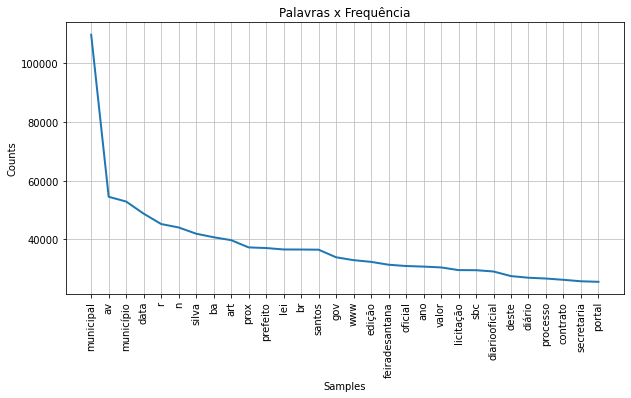

In [27]:
plt.figure(figsize=(10,5))
fd = nltk.FreqDist(clean_text)
fd.plot(30,title = "Palavras x Frequência",cumulative=False)